# On Recursion

## Agenda

1. Recursion
    - Definition
    - Aspirational example
2. The Call Stack
    - Stack frames
    - Stack overflow
3. Recursive "shapes":
    - Linear (single) recursion:
        - Summation
        - Factorial
        - Binary search
    - Tree (multiple) recursion: *divide and conquer*
        - Fibonacci sequence
        - Tower of Hanoi
        - Merge sort
        - Making change

## 1. Recursion

Recursive functions, directly or indirectly, call themselves. 

Recursive solutions are applicable when a problem can be broken down into more easily solved sub-problems that resemble the original, and whose solutions can then be combined.

E.g., computing the combined price of a bunch of nested shopping bags of items:

In [ ]:
class Bag:
    def __init__(self, price, *contents):
        self.price = price
        self.contents = contents

In [ ]:
bag1 = Bag(10)

In [ ]:
bag2 = Bag(5, 
           Bag(3), 
           Bag(7))

In [ ]:
bag3 = Bag(5, 
           Bag(4, 
               Bag(3)), 
           Bag(2))

In [ ]:
bag4 = Bag(0, 
           Bag(5), 
           Bag(10), 
           Bag(3, 
               Bag(2), 
               Bag(100)), 
           Bag(9, 
               Bag(2, 
                   Bag(25))))

In [ ]:
def price(bag):
    total = bag.price
    return total

In [ ]:
price(bag1)

# 2. The call stack

When a function is called, a corresponding *stack frame* is allocated in a structure known as the **call stack**. This stack frame stores (among other things):

1. the function's arguments
2. other local variables (if any)
3. the address in the caller at which to resume execution

When the function returns, its stack frame is deallocated. The call stack is a *LIFO* (last-in, first-out) data structure.

This happens for both non-recursive and recursive functions, but recursive functions can build up a long chain of nested calls before they start returning. If we don't provide a way to stop the recursion, this chain can grow indefinitely, eventually causing a *stack overflow*.

By setting a breakpoint in the debugger, we can see the call stack in action.

In [1]:
# do this so we don't have too many recursive calls

import sys
sys.setrecursionlimit(100)

In [8]:
# set a breakpoint in this cell, and run the following cell with the debugger

def silly_rec(n):
    if n < 0:
        # base case
        return
    else:
        return silly_rec(n-1) # Progress towards base case

In [10]:
silly_rec(10)

Why do recursive functions encounter a `maximum recursion depth exceeded` error?

Because each recursive call consumes memory from the stack frame (the call stack). If the recursion does not stop, we will run out of stack memory, leading to a *stack overflow*.

## 3. Recursive "shapes"

### Linear recursion

#### Example: Sum (of input ≥ 0)

$$
sum(n) = \begin{cases}
        0 & \text{if}\ n=0 \\
        n + sum(n-1) & \text{if}\ n>0
      \end{cases}
$$


E.g., 

$$
\begin{align*}
sum(5) & = 5 + sum(4)\\
       & = 5 + 4 + sum(3)\\
       & = 5 + 4 + 3 + sum(2)\\
       & = 5 + 4 + 3 + 2 + sum(1)\\
       & = 5 + 4 + 3 + 2 + 1 + sum(0)\\
       & = 5 + 4 + 3 + 2 + 1 + 0
\end{align*}
$$

In [11]:
def sum(n):
    pass

In [13]:
sum(5)

15

#### Example: Factorial

$$
n! = \begin{cases}
        1 & \text{if}\ n=0 \\
        n \cdot (n-1)! & \text{if}\ n>0
      \end{cases}
$$

In [14]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [15]:
factorial(5)

120

#### Example: Binary search

In [16]:
def bin_search(x, lst):
    if not lst:
        return False
    else:
        mid = len(lst) // 2
        if lst[mid] == x:
            return True
        elif lst[mid] < x:
            return bin_search(x, lst[mid+1:])
        else:
            return bin_search(x, lst[:mid])

In [17]:
bin_search(25, list(range(100)))

True

In [18]:
bin_search(99, list(range(100)))

True

In [19]:
bin_search(100, list(range(100)))

False

### Tree recursion

What truly increases the space complexity is the amount of computations that simultaneously occupy stack frames.

#### Example: Fibonacci numbers

$$
fib(n) = \begin{cases}
            0 & \text{if}\ n=0 \\
            1 & \text{if}\ n=1 \\
            fib(n-1) + fib(n-2) & \text{otherwise}
          \end{cases}
$$
          
i.e., 0, 1, 1, 2, 3, 5, 8, 13, 21, ...

In [20]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [26]:
[fib(n) for n in range(15)]

9227465

In [22]:
fib(30)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

In [23]:
def fib_iter(n):
    f0 = 0
    f1 = 1
    for _ in range(n):
        f0, f1 = f1, f0 + f1
    return f0

In [24]:
[fib_iter(i) for i in range(15)]

6765

In [27]:
fib_iter(30)

280571172992510140037611932413038677189525

#### Example: Tower of Hanoi

Setup: three rods, with one or more discs of different sizes all stacked on one rod, smallest (top) to largest (bottom). E.g.,

         ||          ||          ||     
         ==          ||          ||     
        ====         ||          ||     
       ======        ||          ||     
    ------------------------------------
    
Goal: move all the discs, one by one, to another rod, with the rules being that (1) only smaller discs can be stacked on larger ones and (2) only the top disc in a stack can be moved to another rod.

For three discs, as shown above, we would carry out the following sequence to move the stack to the rightmost rod. The rods are abbreviated L (left), M (middle), R (right):
1. Move the small disc (0) from L to R
2. Move the medium disc (1) from L to M
3. Move 0 from R to M (R is empty)
4. Move the large disc (2) from L to R
5. Move 0 from M to L
6. Move 1 from M to R
7. Move 0 from L to R (done)

Can you come up with the sequence needed to move a stack of 4 discs from one rod to another? 5 discs? An arbitrary number of discs?

In [28]:
height = 3
towers = [[] for _ in range(3)]
towers[0] = list(range(height, 0, -1))

In [29]:
towers

[[3, 2, 1], [], []]

In [30]:
from time import sleep
from IPython.display import clear_output

def display():
    clear_output(True)
    print('{:^12}'.format('||') * 3)
    for level in range(height, 0, -1):
        for t in towers:
            try:
                print('{:^12}'.format('==' * t[level-1]), end='')
            except IndexError:
                print('{:^12}'.format('||'), end='')
        print()
    print('-' * 36)
    sleep(1)

In [31]:
display()

     ||          ||          ||     
     ==          ||          ||     
    ====         ||          ||     
   ======        ||          ||     
------------------------------------


In [32]:
def move(frm, to):
    towers[to].append(towers[frm].pop(-1))
    display()

In [33]:
move(0, 2)

     ||          ||          ||     
     ||          ||          ||     
    ====         ||          ||     
   ======        ||          ==     
------------------------------------


In [34]:
def hanoi(frm, to, using, levels):
    if levels == 1:
        move(frm, to)
    else:
        # Move levels - 1 discs from frm to using using to
        hanoi(frm, using, to, levels-1)
        # Move bottom disc to to
        move(frm, to)
        # Move levels - 1 discs from using to to using frm
        hanoi(using, to, frm, levels-1)

In [36]:
height = 5
towers = [[] for _ in range(3)]
towers[0] = list(range(height, 0, -1))

hanoi(0, 2, height)

     ||          ||          ||     
     ||          ||          ==     
     ||          ||         ====    
     ||          ||        ======   
------------------------------------


#### Example: Mergesort

In [40]:
def merge(l1, l2): # O(N), where N is the number of elements in the two lists
    merged = []
    i1 = i2 = 0
    while i1 < len(l1) or i2 < len(l2):
        if i2 == len(l2) or (i1 < len(l1) 
                             and l1[i1] < l2[i2]):
            merged.append(l1[i1])
            i1 += 1
        else:
            merged.append(l2[i2])
            i2 += 1
    return merged

In [41]:
l1 = [1, 5, 9]
l2 = [2, 6, 8, 11]

merge(l1, l2)

[1, 2, 5, 6, 8, 9, 11]

In [37]:
def mergesort(lst):
    if len(lst) == 1:
        return lst
    mid = len(lst) // 2
    left = mergesort(lst[:mid])
    right = mergesort(lst[mid:])
    return merge(left, right)

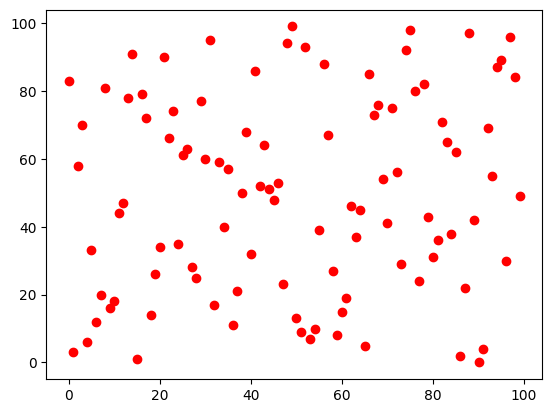

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

lst = list(range(100))
random.shuffle(lst)
plt.plot(lst, 'ro');

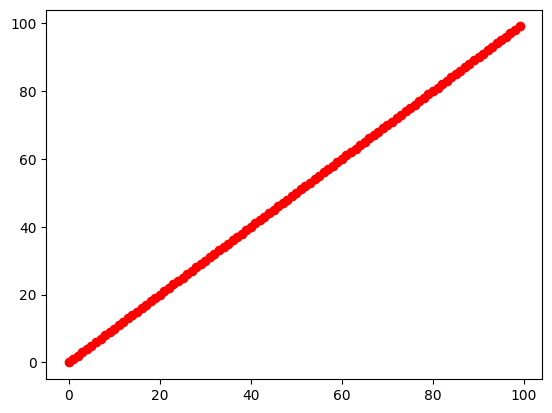

In [42]:
plt.plot(mergesort(lst), 'ro');

In [43]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i, 0, -1):
            if lst[j-1] > lst[j]:
                lst[j-1], lst[j] = lst[j], lst[j-1] # swap
            else:
                break   

In [44]:
class Heap:        
    @staticmethod
    def _parent(idx):
        return (idx - 1) // 2
    
    @staticmethod
    def _left(idx):
        return idx*2 + 1

    @staticmethod
    def _right(idx):
        return idx*2 + 2

    def __init__(self, iterable=None):
        if not iterable:
            self.data = []
        else:
            self.data = list(iterable)
            last_internal_idx = Heap._parent(len(self.data)-1)
            for i in range(last_internal_idx, -1, -1):
                self._heapify(i)

    def add(self, x):
        self.data.append(x)
        idx = len(self.data) - 1
        while idx > 0:
            pidx = Heap._parent(idx)
            if self.data[pidx] < self.data[idx]:
                self.data[pidx], self.data[idx] = self.data[idx], self.data[pidx]
                idx = pidx
            else:
                break    
                                
    def max(self):
        assert len(self) > 0
        return self.data[0]

    def _heapify(self, idx):
        while idx < len(self.data):
            lidx = Heap._left(idx)
            ridx = Heap._right(idx)
            maxidx = idx
            if lidx < len(self.data) and self.data[lidx] > self.data[idx]:
                maxidx = lidx
            if ridx < len(self.data) and self.data[ridx] > self.data[maxidx]:
                maxidx = ridx
            if maxidx != idx:
                self.data[idx], self.data[maxidx] = self.data[maxidx], self.data[idx]
                idx = maxidx
            else:
                break

    def pop_max(self):
        assert len(self) > 0
        ret = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[-1]
        self._heapify(0)
        return ret
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

    
def heapsort(iterable):
    h = Heap(iterable)
    ret = []
    while h:
        ret.append(h.pop_max())
    ret.reverse()
    return ret

In [45]:
import timeit
import random

insertionsort_times = []
heapsort_times = []
mergesort_times = []

for size in range(100, 3000, 100):
    insertionsort_times.append(timeit.timeit(stmt='insertion_sort(lst)',
                               setup=f'lst = random.sample(range(1_000_000), {size})',
                               globals=globals(),
                               number=1))
    heapsort_times.append(timeit.timeit(stmt='heapsort(lst)',
                               setup=f'lst = random.sample(range(1_000_000), {size})',
                               globals=globals(),
                               number=1))
    mergesort_times.append(timeit.timeit(stmt='mergesort(lst)',
                               setup=f'lst = random.sample(range(1_000_000), {size})',
                               globals=globals(),
                               number=1))

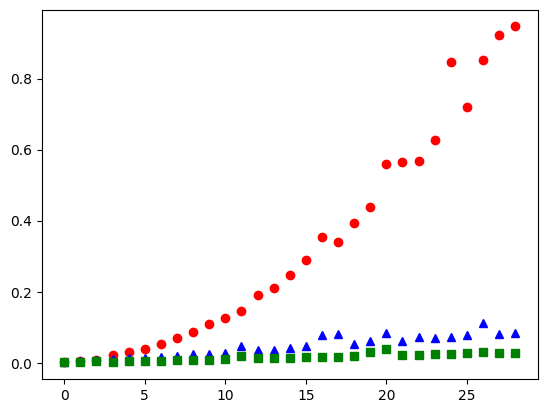

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.plot(insertionsort_times, 'ro')
plt.plot(heapsort_times, 'b^')
plt.plot(mergesort_times, 'gs');

#### Example: Making Change

Question: how many different ways are there of making up a specified amount of money, given a list of available denominations?

E.g., how many ways of making 10 cents, given 1c, 5c, 10c, 25c coins?

In [47]:
def change(amount, denoms):
    # Left: apply one value of first denomination
    # Right: remove first denomination from consideration
    if amount == 0:
        return 1
    elif amount < 0 or len(denoms) == 0:
        return 0
    else:
        return change(amount-denoms[0], denoms) + change(amount, denoms[1:])

In [48]:
change(5, (1, 5, 10, 25))

2

In [49]:
change(10, (1, 5, 10, 25))

4

In [50]:
change(100, (1, 5, 10, 25))

242

In [51]:
def change(amount, denoms):
    # Left: apply one value of first denomination
    # Right: remove first denomination from consideration
    if amount == 0:
        return [()]
    elif amount < 0 or len(denoms) == 0:
        return []
    else:
        ways1 = [w + (denoms[0],) for w in change(amount-denoms[0], denoms)]
        ways2 = change(amount, denoms[1:])
        return ways1 + ways2

In [52]:
change(5, (1, 5, 10, 25))

[(1, 1, 1, 1, 1), (5,)]

In [53]:
change(10, (1, 5, 10, 25))

[(1, 1, 1, 1, 1, 1, 1, 1, 1, 1), (5, 1, 1, 1, 1, 1), (5, 5), (10,)]